In [20]:
import numpy as np
import matplotlib.pyplot as p

In [21]:
N = 1000
x = np.linspace(0,20*np.pi,N)
signal1 = np.sin(x)
signal2 = 0.5*np.sin(10*x)
noise = 2*(np.random.random_sample(N)-0.5)
signal = signal1 + signal2
signal += noise

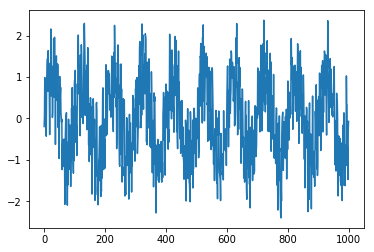

In [22]:
p.plot(signal)

In [47]:
def dft(v):
    N = len(v)
    n_mat, k_mat = np.meshgrid(np.arange(N),np.arange(N))
    exp_mat = np.zeros((N,N),dtype="complex_")
    np.exp(-1j*2*np.pi/N*np.triu(n_mat*k_mat), out=exp_mat)
    exp_mat = exp_mat + exp_mat.T - np.diag(exp_mat.diagonal())
    vt = np.matmul(exp_mat,v)
    return vt

def dft_lm(v):
    #low(er) memory dft
    N = len(v)
    vt = np.zeros(N,dtype="complex_")
    z = np.exp(-1j*2*np.pi/N)
    for n in np.arange(N):
        for k in np.arange(N):
            vt[k] += np.power(z,n*k)*v[n]
    return vt

def qdft(v):
    #maybe quicker dft
    N = len(v)
    n_vec = np.arange(N)
    n_mat, k_mat = np.meshgrid(np.arange(N),np.arange(N))
    vt = np.zeros(N,dtype="complex_")
    exp_mat = np.zeros((N,N),dtype="complex_")
    exp_vec = np.exp(-1j*2*np.pi/N*n_vec)
    ind_mat = np.mod(n_mat*k_mat, N, dtype=np.intp)
    exp_mat = exp_vec[ind_mat]
    vt = np.matmul(exp_mat,v)
    return vt

def idft(v):
    N = len(v)
    n_mat, k_mat = np.meshgrid(np.arange(N),np.arange(N))
    exp_mat = 1/N*np.exp(1j*2*np.pi/N*n_mat*k_mat)
    vt = np.matmul(exp_mat,v)
    return vt

In [48]:
vt = dft(signal)
vt_q = qdft(signal)
vtt = idft(vt)
vt_fft = np.fft.fft(signal)

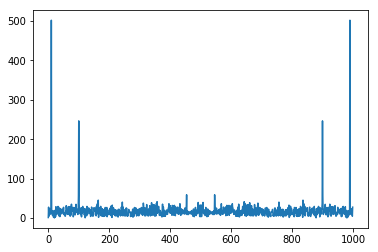

In [49]:
p.plot(np.abs(vt_q))

In [50]:
%%timeit
vt_q = qdft(signal)

10 loops, best of 5: 27.1 ms per loop


In [51]:
%%timeit
vt = dft(signal)

10 loops, best of 5: 77.5 ms per loop


In [34]:
%%timeit
vt_lm = dft_lm(signal)

1 loop, best of 5: 2.72 s per loop


In [9]:
%%timeit
vt_fft = np.fft.fft(signal)

The slowest run took 19.32 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 19.9 µs per loop


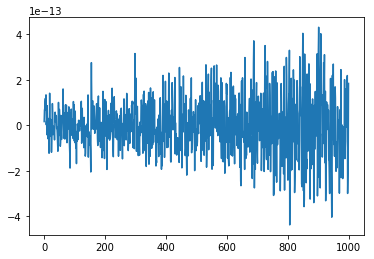

In [10]:
p.plot(np.real(vtt-signal))

In [11]:
from scipy.io import wavfile
rate, data = wavfile.read("Recording_1")

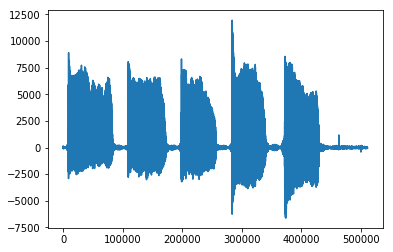

In [12]:
p.plot(data)

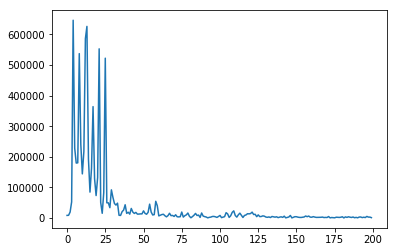

In [15]:
wav = data[300000:301000]
wavt = dft(wav)
p.plot(np.abs(wavt)[0:200])

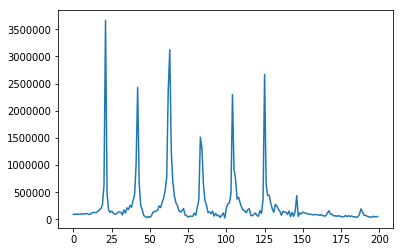

In [16]:
wav = data[300000:305000]
wavt = dft(wav)
p.plot(np.abs(wavt)[0:200])